In [59]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

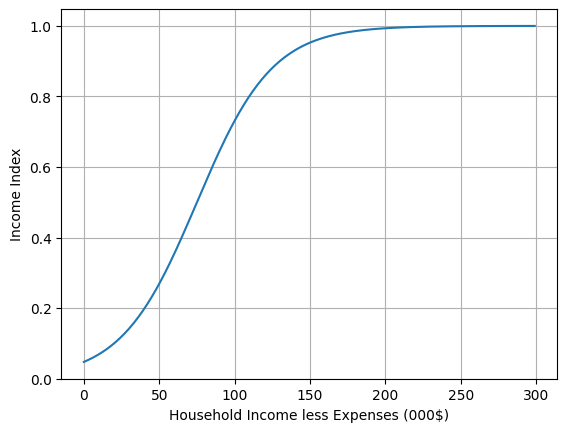

In [60]:
# measures whether a family is financially able to provide for a pet
def get_income_index(income, required_income = 75e3):
    steepness = -0.00004
    return 1 / (1 + math.exp(steepness*(income-required_income)))

X = np.arange(0,300E3, 1E3)
Y = np.array([get_income_index(x) for x in X])

plt.grid()
plt.xlabel("Household Income less Expenses (000$)")
plt.ylabel("Income Index")
plt.plot(X/1000,Y)

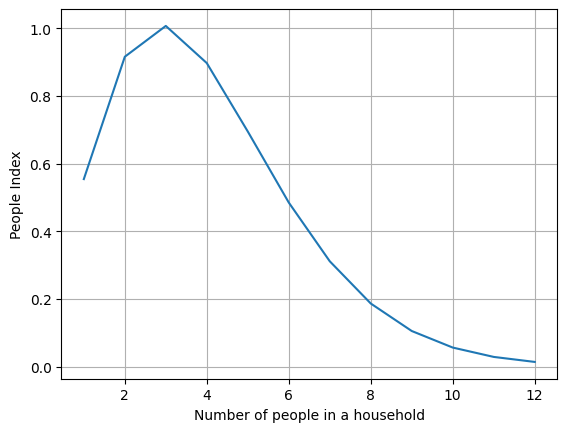

In [61]:
# measures whether there is sufficient space to fit a pet into the household
def get_people_index(number_of_people):
    # poisson distribution to obtain a suitable shape
    return 2 * math.exp(-0.7) * 0.7**(0.4*number_of_people-1) / math.gamma(0.4*number_of_people) 

# TODO:
# can convert to population densitry
# can do a hard cap on land area
# can do housing area in cases of ppl living on a farm

X = np.arange(1,13)
Y = np.array([get_people_index(x) for x in X])

plt.grid()
plt.xlabel("Number of people in a household")
plt.ylabel("People Index")
plt.plot(X,Y)

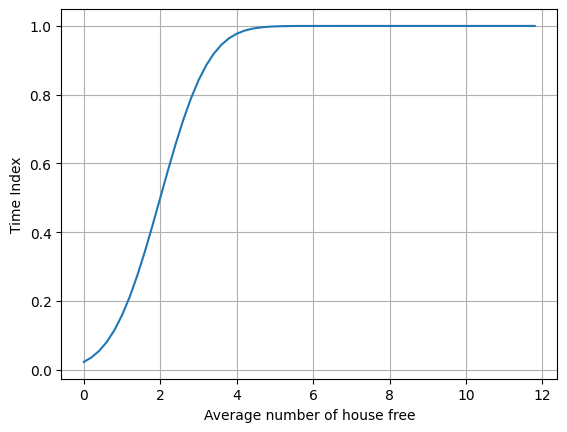

In [62]:
# measures whether someone has the time to take care of a pet
def get_time_index(owner_free_time, pet_time_requirement = 2, free_time_std = 1):
    z = (owner_free_time - pet_time_requirement) / free_time_std
    return norm.cdf(z)

X = np.arange(0, 12, 0.2)
Y = np.array([get_time_index(x) for x in X])

plt.grid()
plt.xlabel("Average number of house free")
plt.ylabel("Time Index")
plt.plot(X,Y)

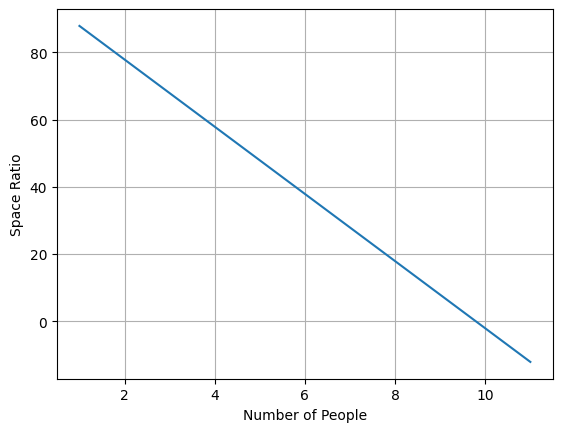

In [63]:
def get_space_ratio(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
    human_space = 0.6 * floor_area + 10*math.log10(outside_area) - neccesary_space - space_per_person*people - space_for_pet
    space_ratio = human_space / space_for_pet

    return space_ratio

X = np.arange(1, 12, 1)
Y = np.array([get_space_ratio(300, 600, x) for x in X])

plt.grid()
plt.xlabel("Number of People")
plt.ylabel("Space Ratio")
plt.plot(X,Y)

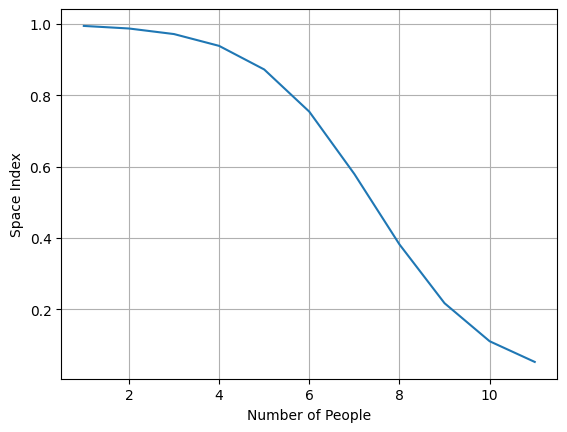

In [64]:
def get_space_index(floor_area, outside_area, people, space_for_pet = 2, neccesary_space = 10, space_per_person = 20):
    ratio = get_space_ratio(floor_area, outside_area, people, space_for_pet, neccesary_space, space_per_person)
    return 1/(1+math.exp(-0.08*(ratio-30)))

X = np.arange(1, 12, 1)
Y = np.array([get_space_index(300, 10000, x) for x in X])

plt.grid()
plt.xlabel("Number of People")
plt.ylabel("Space Index")
plt.plot(X,Y)


In [79]:
# ---- params ----

# income
income = 80 * 1e3

# space parameters
people = 7
outside_area = 600
floor_area = 300
pet_area = 2

# amount of time that can be spent on the pet
# std = 1
free_time = 5
pet_time = 2

In [80]:
income_index = get_income_index(income)
people_index = get_people_index(people)
time_index = get_time_index(free_time, pet_time)

income_index, people_index, time_index

(0.549833997312478, 0.31174475762629716, 0.9986501019683699)

In [81]:
fitness_index = 1/3 * income_index + 1/3 * people_index + 1/3 * time_index
fitness_index

0.6200762856357149

In [82]:
def get_fitness_index(income, people, outside_area, floor_area, pet_area, free_time, pet_time):
    income_index = get_income_index(income)
    space_index = get_space_index(floor_area, outside_area, people, pet_area)
    time_index = get_time_index(free_time, pet_time)

    return income_index, space_index, time_index

In [87]:
get_fitness_index(income, people, outside_area, floor_area, pet_area, free_time, pet_time)

(0.549833997312478, 0.45791493508684017, 0.9986501019683699)